# Notebook to assist decisions on CM map settings

In [1]:
# Basics
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import seaborn as sns
import geopandas as gpd
import sqlalchemy as sa
# sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
# Views 3
from viewser.operations import fetch
from viewser import Queryset, Column
import views_runs
from views_partitioning import data_partitioner, legacy
from stepshift import views
from views_mapper2.label_writer import *
from views_mapper2.mapper2 import *
from views_mapper2.BBoxWriter import *
from views_mapper2.dictionary_writer import *

import geopandas as gpd
import sqlalchemy as sa
from ingester3.config import source_db_path

In [2]:
engine = sa.create_engine(source_db_path)
gdf_ci_master = gpd.GeoDataFrame.from_postgis(
    "SELECT id as country_id, name, in_africa, in_me, geom FROM prod.country",
    engine,
    geom_col='geom'
)
gdf_ci_master = gdf_ci_master.to_crs(4326)

In [3]:
#!viewser queryset list

In [4]:
qs = Queryset('fatalities002_API_predictors_cm','country_month') # Change to queryset and level of analysis of interest

data = qs.fetch()

 .    

In [5]:
data.describe()

,year,month,gwcode,ucdp_ged_sb_best_sum,ucdp_ged_os_best_sum,ucdp_ged_ns_best_sum,vdem_v12_v2x_rule,vdem_v12_v2x_gender,vdem_v12_v2x_civlib,vdem_v12_v2xcl_acjst,vdem_v12_v2xeg_eqdr,vdem_v12_v2x_libdem,wdi_ny_gdp_pcap_kd,wdi_sp_dyn_le00_in,wdi_se_prm_nenr,wdi_sp_pop_totl,wdi_sp_dyn_imrt_in,fao_faostat_wheat_price,fao_faostat_sugar_price,fao_faostat_milk_price,fao_faostat_meat_price,fao_faostat_pct_pop_basicdrink,fao_faostat_pct_undernourished,fao_faostat_pcap_fsupply_var,fao_aquastat_renewable_pcap,fao_aquastat_general_efficiency,fao_aquastat_services_efficiency
count,158230.000000,158230.000000,158230.000000,77275.000000,77275.000000,77275.00000,82816.000000,82029.000000,82816.000000,82816.000000,82816.000000,82552.000000,84167.000000,85920.000000,44178.000000,9.016600e+04,89878.000000,63107.000000,59387.000000,57737.000000,5.988700e+04,47796.000000,47796.000000,47796.000000,73823.000000,40447.000000,59821.000000
mean,2015.781192,6.502503,472.934349,24.148806,11.672520,4.07318,0.529983,0.660394,0.640180,0.620891,0.583084,0.373110,10586.985815,66.946202,86.072086,3.373708e+07,38.446563,131.865193,125.961081,142.795800,2.580585e+04,81.556913,9.536760,36.372479,23313.031724,31.160426,84.101811
std,20.216883,3.452201,265.042933,446.069508,1612.888271,56.00312,0.312336,0.212919,0.277547,0.281658,0.284612,0.277348,15826.228899,9.981905,16.185295,1.268511e+08,35.359617,2816.364692,1819.810913,1604.750604,5.453806e+05,23.567811,11.795547,30.350574,61604.972730,62.592425,109.795152
min,1980.000000,1.000000,2.000000,0.000000,0.000000,0.00000,0.009000,0.046000,0.016000,0.009000,0.018000,0.005000,165.934266,14.098000,14.308450,7.635000e+03,1.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.130782,0.603135
25%,1999.000000,4.000000,305.000000,0.000000,0.000000,0.00000,0.255000,0.498000,0.409000,0.385000,0.317000,0.117000,1383.079293,60.398000,84.105880,1.806890e+06,10.700000,0.000000,0.000000,0.000000,0.000000e+00,70.700000,2.490000,17.000000,1576.215067,3.887174,20.912196
50%,2016.000000,7.000000,461.000000,0.000000,0.000000,0.00000,0.515000,0.699000,0.715000,0.658000,0.629000,0.306000,3785.552798,69.306000,92.274850,7.088906e+06,25.700000,0.000000,0.000000,0.000000,0.000000e+00,92.600000,4.300000,31.000000,4106.989473,11.535319,44.597745
75%,2033.000000,10.000000,690.000000,0.000000,0.000000,0.00000,0.840000,0.843000,0.893000,0.871000,0.859000,0.630000,11805.671841,74.480488,96.435790,2.190644e+07,57.400000,0.000000,0.000000,0.000000,0.000000e+00,98.700000,13.400000,50.000000,18727.958912,34.177377,102.295980
max,2050.000000,12.000000,990.000000,79609.000000,443929.000000,5664.00000,0.999000,0.967000,0.978000,0.997000,0.989000,0.896000,114047.906127,84.615610,100.000000,1.412360e+09,189.900000,213572.929302,140000.000000,61988.869205,1.725000e+07,99.000000,81.700000,259.000000,703694.811700,1230.797017,1141.124645


In [6]:
data.head()

year  month isoab              country  gwcode  \
month_id country_id                                                   
1        1           1980      1   GUY               Guyana     110   
         2           1980      1   SUR             Suriname     115   
         3           1980      1   TTO  Trinidad and Tobago      52   
         4           1980      1   VEN            Venezuela     101   
         5           1980      1   WSM                Samoa     990   

                     ucdp_ged_sb_best_sum  ucdp_ged_os_best_sum  \
month_id country_id                                               
1        1                            NaN                   NaN   
         2                            NaN                   NaN   
         3                            NaN                   NaN   
         4                            NaN                   NaN   
         5                            NaN                   NaN   

                     ucdp_ged_ns_best_sum  vdem_v12_v2x_rule  \
month_id country_id                                            
1        1                            NaN              0.467   
         2                            NaN              0.670   
         3                            NaN              0.872   
         4                            NaN              0.575   
         5                            NaN                NaN   

                     vdem_v12_v2x_gender  vdem_v12_v2x_civlib  \
month_id country_id                                             
1        1                         0.760                0.587   
         2                         0.611                0.536   
         3                         0.659                0.882   
         4                         0.748                0.873   
         5                           NaN                  NaN   

                     vdem_v12_v2xcl_acjst  vdem_v12_v2xeg_eqdr  \
month_id country_id                                              
1        1                          0.770                0.658   
         2                          0.601                0.589   
         3                          0.895                0.660   
         4                          0.644                0.648   
         5                            NaN                  NaN   

                     vdem_v12_v2x_libdem  wdi_ny_gdp_pcap_kd  \
month_id country_id                                            
1        1                         0.186         3231.783461   
         2                         0.190         7115.062369   
         3                         0.566         8593.171355   
         4                         0.608                 NaN   
         5                           NaN                 NaN   

                     wdi_sp_dyn_le00_in  wdi_se_prm_nenr  wdi_sp_pop_totl  \
month_id country_id                                                         
1        1                       61.229              NaN         778176.0   
         2                       62.034              NaN         375112.0   
         3                       67.572          86.2554        1127852.0   
         4                       68.762              NaN       15210443.0   
         5                       64.748              NaN         164905.0   

                     wdi_sp_dyn_imrt_in  fao_faostat_wheat_price  \
month_id country_id                                                
1        1                         53.1                      NaN   
         2                          NaN                      NaN   
         3                         34.2                      NaN   
         4                         35.3                      NaN   
         5                         35.3                      NaN   

                     fao_faostat_sugar_price  fao_faostat_milk_price  \
month_id country_id                                                    
1        1                               NaN                     NaN   
   

# Select month to plot

In [7]:
# Call the function

def vid2date(i):
    year=str(ViewsMonth(i).year)
    month=str(ViewsMonth(i).month)
    return year+'/'+monthb

**Enter year and month below to print the correlated `month_id`**

In [31]:
print(ViewsMonth.from_year_month(year=1990, month=1)) 

ViewsMonth(id=121) #=> year:1990, month:1


**Enter the printed month ID to plot**

In [9]:
chosen_month=450

# Select feature to map

In [10]:
feature = 'ucdp_ged_sb_best_sum'

# Select mapping settings

Match map dictionary with applied data transformation:

- Non-logged data with non-logged dictionary
- ln data with 1p dictionary
- ln2 data with 2p dictionary

### Choice of map dictionaries:

In [11]:
dictionary_stand_2p_10k  # for ln2 data, values up to 10k (e.g. cm predictions)

{'0': 0.0,
 '1': 0.5265890341390445,
 '3': 0.8697416861919438,
 '10': 1.223156202527103,
 '30': 1.4892992254175486,
 '100': 1.7254630513334037,
 '300': 1.9031681972312866,
 '1000': 2.067970345786057,
 '3000': 2.1979688386872795,
 '10000': 2.3234107621942104}

In [12]:
dictionary_stand_2p # ln2 scale, values up to 3k

{'0': 0.0,
 '1': 0.5265890341390445,
 '3': 0.8697416861919438,
 '10': 1.223156202527103,
 '30': 1.4892992254175486,
 '100': 1.7254630513334037,
 '300': 1.9031681972312866,
 '1000': 2.067970345786057,
 '3000': 2.1979688386872795}

In [13]:
dictionary_stand_1p = {'0': 0.0,
 '1': 0.6931471805599453,
 '3': 1.3862943611198906,
 '10': 2.3978952727983707,
 '30': 3.4339872044851463,
 '100': 4.61512051684126,
 '300': 5.707110264748875,
 '1000': 6.90875477931522,
 '3000': 8.006700845440367}

In [14]:
dictionary_stand_10k = {'0': 0, '100': 100, '300': 300, '1000': 1000, '3000': 3000, '10000': 10000}

In [15]:
dictionary_stand # non-logged, values up to 3k

{'0': 0, '100': 100, '300': 300, '1000': 1000, '3000': 3000}

In [16]:
dictionary_dichotomous_pgm = {
        '<= 0.1%': -6.906754778648554,
        '0.2%': -6.212606095751519,
        '0.5%': -5.293304824724492,
        '1%': -4.59511985013459,
        '2%': -3.8918202981106265,
        '5%': -2.9444389791664403,
        '10%': -2.197224577336219,
        '20%': -1.3862943611198906,
        '40%': -0.4054651081081643,
        '60%': 0.4054651081081642,
        '80%': 1.3862943611198908,
        '90%': 2.1972245773362196,
        '95%': 2.9444389791664394,
        '99%': 4.595119850134589
        }


In [17]:
dictionary_dichotomous_cm = {
        '<= 0.1%': -6.906754778648554,
        '0.2%': -6.212606095751519,
        '0.5%': -5.293304824724492,
        '1%': -4.59511985013459,
        '2%': -3.8918202981106265,
        '5%': -2.9444389791664403,
        '10%': -2.197224577336219,
        '20%': -1.3862943611198906,
        '40%': -0.4054651081081643,
        '60%': 0.4054651081081642,
        '80%': 1.3862943611198908,
        '90%': 2.1972245773362196,
        '95%': 2.9444389791664394,
        '99%': 4.595119850134589
        }   

In [18]:
# Index, 0-300

raw_values = np.array([0,10, 30, 100, 300])
ticklabels = [str(tv) for tv in raw_values]
dictionary_index_0_300 = dict(zip(ticklabels, raw_values))
dictionary_index_0_300

{'0': 0, '10': 10, '30': 30, '100': 100, '300': 300}

In [19]:
dictionary_index_0_1 = {'0.0': 0.0, '0.2': 0.2, '0.4': 0.4, '0.6': 0.6, '0.8': 0.8, '1.0': 1.0}

In [20]:
dictionary_gdp = {
    '150': 5.0106352940962555,
    '500': 6.214608098422191,
    '1500': 7.313220387090301,
    '5000': 8.517193191416238,
    '15000': 9.615805480084347,
    '50000': 10.819778284410283}

In [21]:
dictionary_index_0_100 = {'0': 0,
    '10': 10,
    '20': 20,
    '30': 30,
    '40': 40,
    '50': 50,
    '60': 60,
    '70': 70,
    '80': 80,
    '90': 90,
    '100': 100}

In [22]:
dictionary_population = {'0.01': 9.210440366976517,
 '0.03': 10.308985993422082,
 '1': 13.815511557963774,
 '3': 14.914123179965662,
 '10': 16.118095750958314,
 '30': 17.216707972959764,
 '100': 18.420680753952364,
 '300': 19.519293035953808,
 '1000': 20.72326583794641}

In [23]:
dictionary_imr = {'0': 0, '20': 20, '40': 40, '60': 60, '80': 80, '100': 100}

In [24]:
dictionary_index_0_300 = {'0': 0, '10': 10, '30': 30, '100': 100, '300': 300}

### Select data transform for plotting

In [25]:
transform=''     # , ln_, ln2_

In [26]:
# Executes the transforms

if transform == 'ln_':
    data[f'{transform}'+f'{feature}'] = np.log1p(data[f'{feature}'])

elif transform == 'ln2_':
    data[f'{transform}'+f'{feature}'] = np.log1p(np.log1p(data[f'{feature}']))

else: print("No transform applied")

No transform applied


### Select color map

In [27]:
cmap = 'rainbow'

### Select map dictionary

In [28]:
map_dictionary = dictionary_dichotomous_pgm

# Plot the data

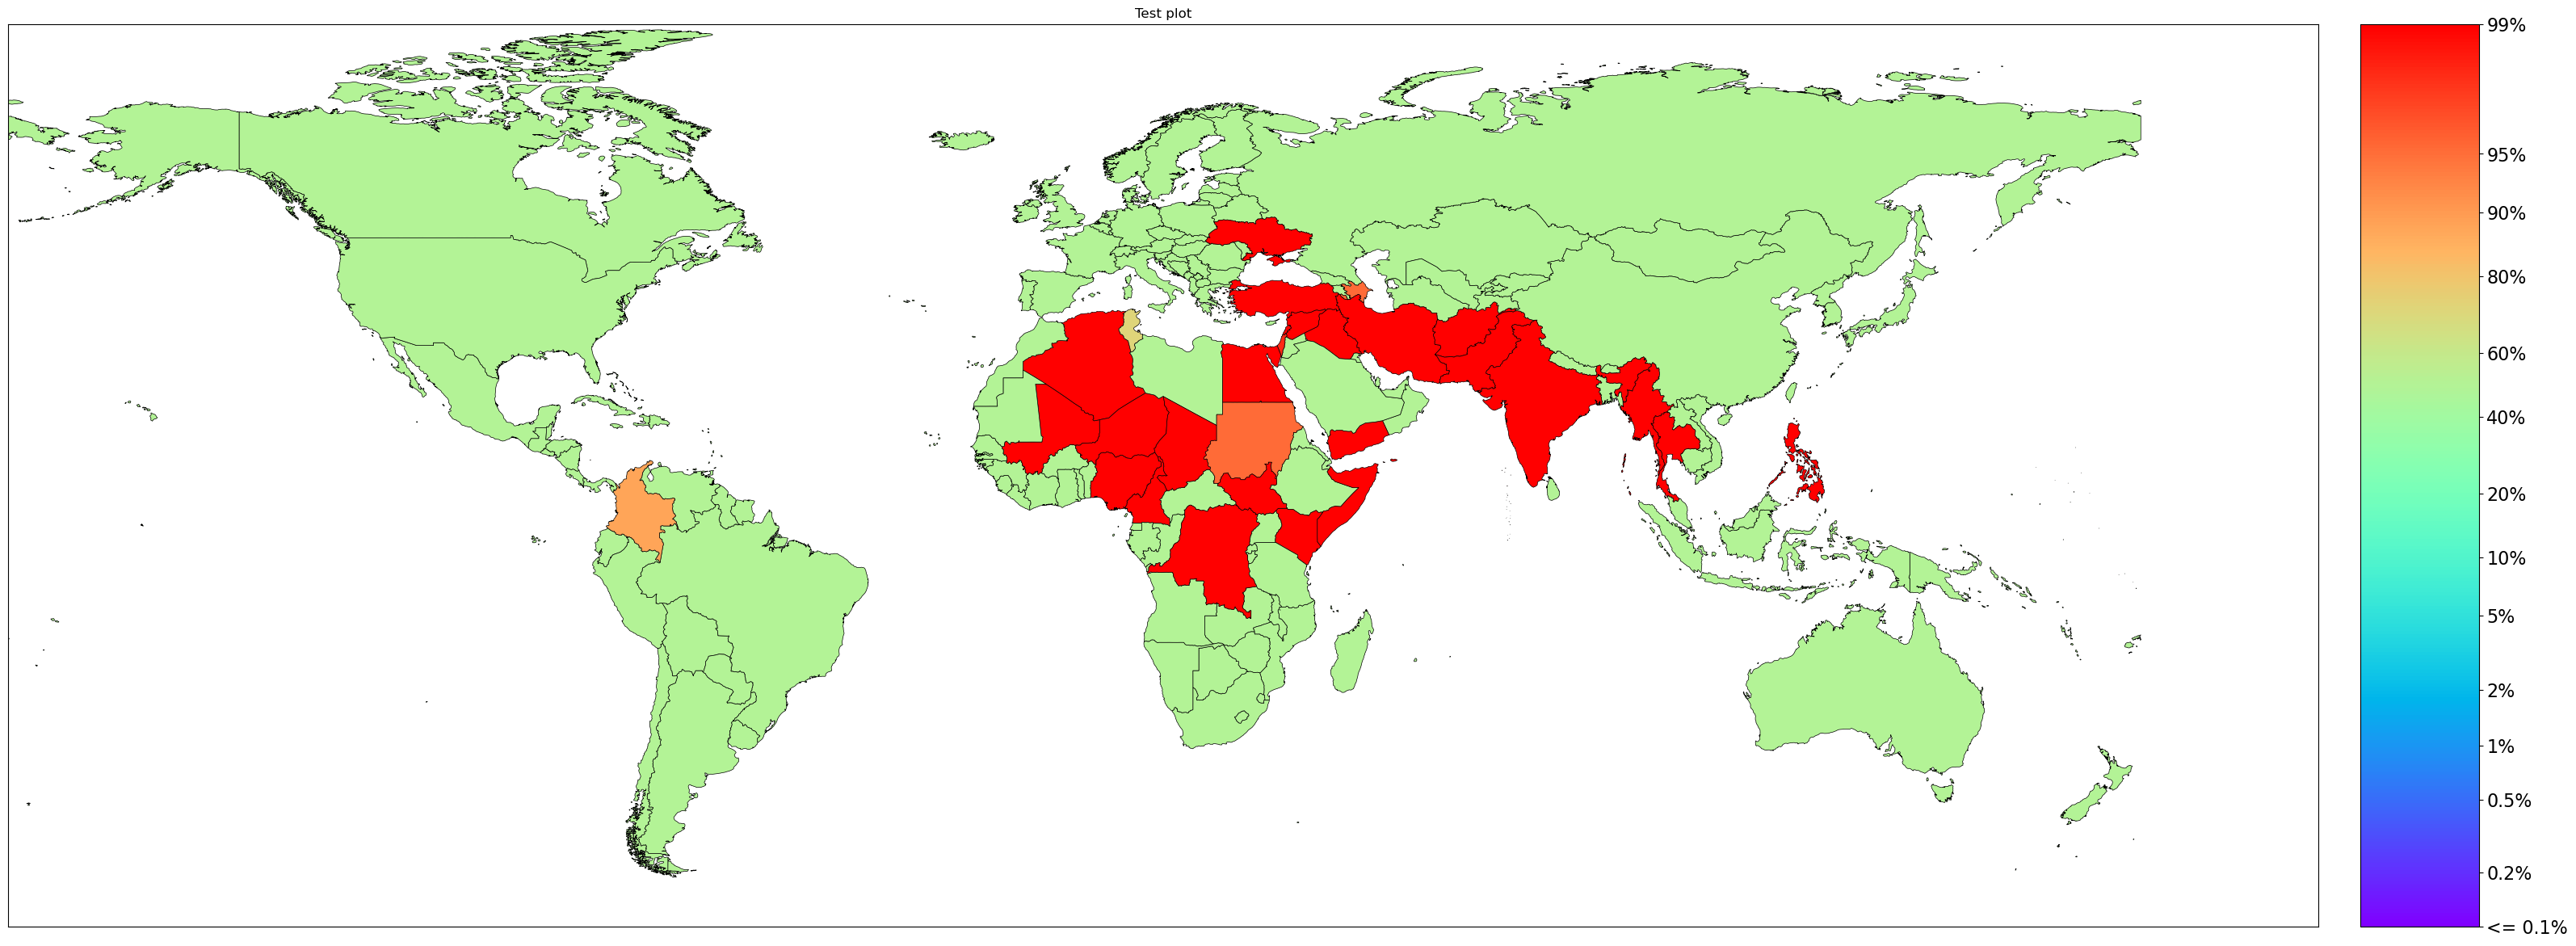

In [29]:
data = data.copy()
gdf = gdf_ci_master.copy()

data = data.join(gdf.set_index("country_id"))
gdf = gpd.GeoDataFrame(data, geometry="geom")

m = Mapper2(
    width=40,
    height=40,
    frame_on=True,
    title='Test plot',
    bbox=bbox_from_cid('globe'), 
    figure = None
).add_layer(
    gdf=gdf.loc[chosen_month],
    transparency = 1.0,
    edgecolor="black",
    linewidth=0.5,
    cmap = cmap,
    column = f'{transform}'+f'{feature}', 
    map_dictionary = map_dictionary,
)

In [30]:
m.save(f'{cmap}_dictionary_dichotomous_cm', dpi = 300)